In [25]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
# Reading data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

students_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/googlep/Student_Performance.csv")

In [28]:
students_data.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [29]:
students_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [30]:
students_data.isnull().sum()
# No Null Values

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [31]:
students_data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


<Figure size 1700x800 with 0 Axes>

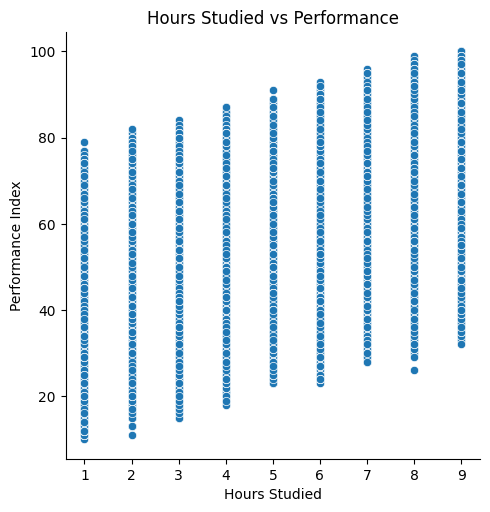

In [32]:
plt.figure(figsize = (17, 8))
sns.relplot(x="Hours Studied", y="Performance Index", data = students_data)
plt.title("Hours Studied vs Performance")
plt.show()

<Figure size 1700x800 with 0 Axes>

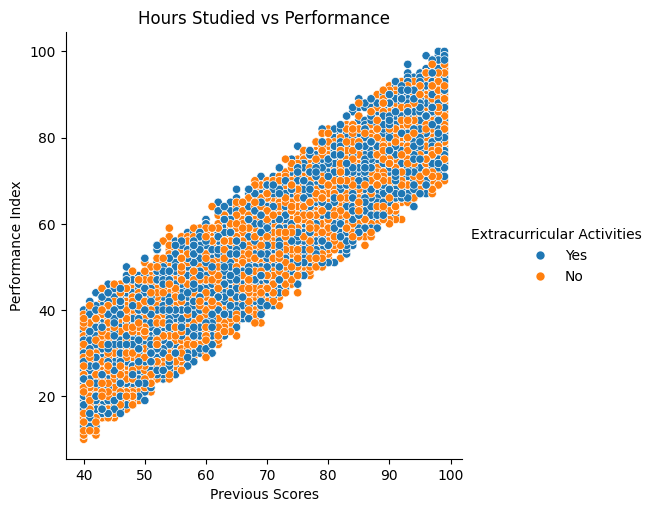

In [33]:
plt.figure(figsize = (17, 8))
sns.relplot(x="Previous Scores", y="Performance Index", hue = "Extracurricular Activities", data = students_data)
plt.title("Hours Studied vs Performance")
plt.show()

<Figure size 1700x800 with 0 Axes>

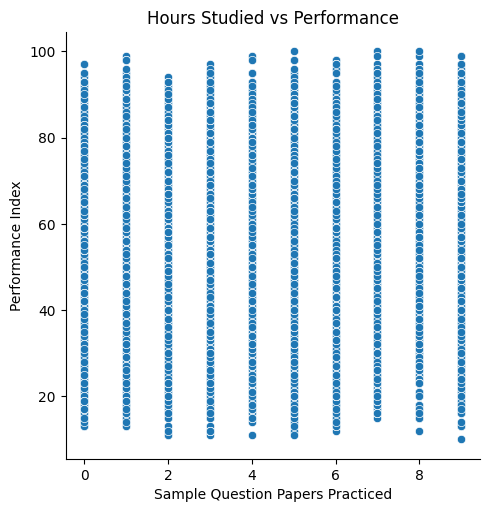

In [34]:
plt.figure(figsize = (17, 8))
sns.relplot(x="Sample Question Papers Practiced", y="Performance Index", data = students_data)
plt.title("Hours Studied vs Performance")
plt.show()

<Axes: >

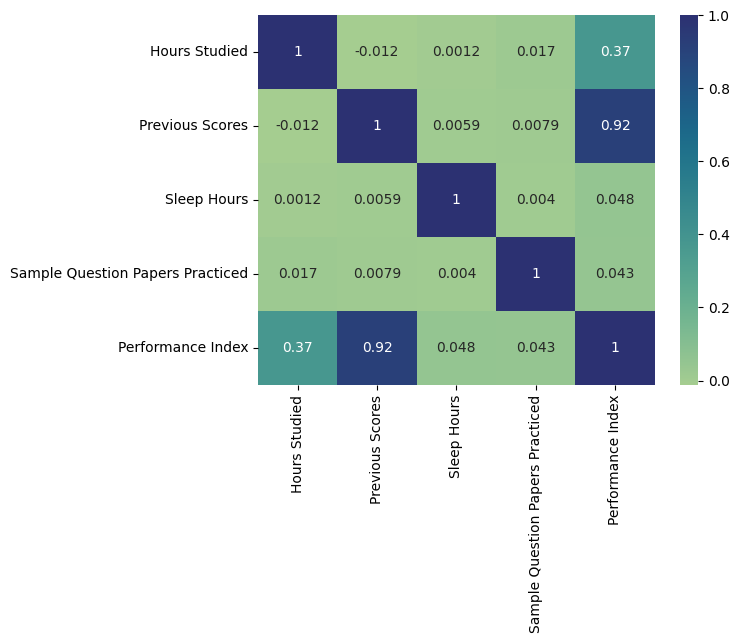

In [35]:
sns.heatmap(students_data.drop("Extracurricular Activities", axis = 1). corr(), annot = True, cmap = "crest")

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
scaler = StandardScaler()

In [38]:
columns = students_data.columns
columns.drop("Extracurricular Activities")

Index(['Hours Studied', 'Previous Scores', 'Sleep Hours',
       'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [39]:
scalar_data = pd.DataFrame(scaler.fit_transform(students_data.drop("Extracurricular Activities", axis = 1)), columns = students_data.columns.drop("Extracurricular Activities"))

In [40]:
scalar_data.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,0.775188,1.704176,1.456205,-1.249754,1.862167
1,-0.383481,0.723913,-1.492294,-0.900982,0.508818
2,1.161410,-1.063626,0.276805,-0.900982,-0.532220
3,0.002742,-1.005963,-0.902594,-0.900982,-1.000687
4,0.775188,0.320275,0.866505,0.145333,0.560870


In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x = scalar_data.drop("Performance Index", axis = 1)
y = scalar_data["Performance Index"]

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
lr = LinearRegression()

In [46]:
lr.fit(x_train, y_train)

LinearRegression()

In [47]:
lr.score(x_test, y_test)

0.9887299686226686

In [48]:
y_pred = lr.predict(x_test)